In [13]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import sqlite3
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
dfSurvivals = pd.read_excel("dataset/titanic3.xls", index_col=None)
dfSurvivals.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
dfSurvivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [16]:
(dfSurvivals.isnull() | dfSurvivals.empty | dfSurvivals.isna()).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [17]:
def show_percentage_missing(column_name, data_frame):

    total_rows = data_frame.shape[0]
    
    missing_values = data_frame[column_name].isnull().sum()
    
    percentage_missing = (missing_values / total_rows) * 100
    
    rounded_percentage = round(percentage_missing, 3)
    
    print(f"Percent of missing '{column_name}' records is {rounded_percentage} %")

In [18]:
columns_to_check = ["age", "fare", "cabin", "embarked", "boat", "body", "home.dest"]

for column in columns_to_check:
    show_percentage_missing(column, dfSurvivals)

Percent of missing 'age' records is 20.092 %
Percent of missing 'fare' records is 0.076 %
Percent of missing 'cabin' records is 77.464 %
Percent of missing 'embarked' records is 0.153 %
Percent of missing 'boat' records is 62.872 %
Percent of missing 'body' records is 90.756 %
Percent of missing 'home.dest' records is 43.086 %


In [19]:
count_unique_values = {column: dfSurvivals[column].nunique() for column in ['fare','cabin', 'embarked', 'ticket']}
count_unique_values

{'fare': 281, 'cabin': 186, 'embarked': 3, 'ticket': 939}

In [20]:
dfSurvivals["fare"].fillna(value = dfSurvivals["fare"].mean(), inplace=True)
dfSurvivals["embarked"].fillna(dfSurvivals["embarked"].value_counts().idxmax(), inplace=True)

In [21]:
dfSurvivals[['Last Name', 'Title First Name']] = dfSurvivals["name"].str.split(',', expand=True)
dfSurvivals[['Title', 'First Name']] = dfSurvivals["Title First Name"].str.split('.', n=1, expand=True)
dfSurvivals = dfSurvivals.drop(columns = ['name', 'Title First Name'], axis = 1)
dfSurvivals['Passenger Id'] = dfSurvivals.index + 1

In [26]:
#dfSurvivals.drop(["home.dest", "cabin"], axis=1, inplace=True)

In [25]:
dfSurvivals["boat"].fillna('DNS', inplace=True)
dfSurvivals["body"] = np.where(dfSurvivals["survived"] == 1, dfSurvivals["body"].fillna('S'), dfSurvivals["body"])
dfSurvivals["body"].fillna('BNR', inplace=True)

In [28]:
# Keep and reorder columns we're interested in
dfSurvivals=dfSurvivals[["Passenger Id", "Title", "First Name", "Last Name", "sex", "age", "sibsp", "parch", "pclass",
                             "fare", "embarked", "boat", "body", "survived"]]

In [29]:
dfSurvivals.groupby(["Title", "sex", "pclass"])["age"].median()

Title          sex     pclass
 Capt          male    1         70.0
 Col           male    1         54.5
 Don           male    1         40.0
 Dona          female  1         39.0
 Dr            female  1         49.0
               male    1         47.0
                       2         38.5
 Jonkheer      male    1         38.0
 Lady          female  1         48.0
 Major         male    1         48.5
 Master        male    1          6.0
                       2          2.0
                       3          6.0
 Miss          female  1         30.0
                       2         20.0
                       3         18.0
 Mlle          female  1         24.0
 Mme           female  1         24.0
 Mr            male    1         41.5
                       2         30.0
                       3         26.0
 Mrs           female  1         45.0
                       2         30.5
                       3         31.0
 Ms            female  2         28.0
                    

In [31]:
#dfSurvivals.dropna(subset=["age"], inplace=True)

In [32]:
dfSurvivals["age"] = dfSurvivals.groupby(["Title", "sex", "pclass"])["age"].apply(lambda x: x.fillna(x.median()))
print(f"Number of NA values: \n{dfSurvivals.isna().sum()}")

Number of NA values: 
Passenger Id    0
Title           0
First Name      0
Last Name       0
sex             0
age             0
sibsp           0
parch           0
pclass          0
fare            0
embarked        0
boat            0
body            0
survived        0
dtype: int64


C:\Users\juank\AppData\Local\Temp\ipykernel_22720\30495221.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfSurvivals["age"] = dfSurvivals.groupby(["Title", "sex", "pclass"])["age"].apply(lambda x: x.fillna(x.median()))


In [33]:
# Rename columns
dfSurvivals = dfSurvivals.rename(
    columns={"sex": "Sex",
            "age": "Age",
            "sibsp": "Sibling/Spouse Abroad",
            "parch": "Parent/Children Abroad",
            "ticket": "Ticket Number",
            "pclass": "Passenger Class",
            "fare": "Fare",
            "embarked": "Embarkation Port",
            "boat": "Survival Boat",
            "body": "Body Number",
            "home.dest": "Home/Destination",
            "survived": "Survived"})

In [34]:
dfSurvivals.head()

,Passenger Id,Title,First Name,Last Name,Sex,Age,Sibling/Spouse Abroad,Parent/Children Abroad,Passenger Class,Fare,Embarkation Port,Survival Boat,Body Number,Survived
0,1,Miss,Elisabeth Walton,Allen,female,29.0000,0,0,1,211.3375,S,2,S,1
1,2,Master,Hudson Trevor,Allison,male,0.9167,1,2,1,151.5500,S,11,S,1
2,3,Miss,Helen Loraine,Allison,female,2.0000,1,2,1,151.5500,S,DNS,BNR,0
3,4,Mr,Hudson Joshua Creighton,Allison,male,30.0000,1,2,1,151.5500,S,DNS,135.0,0
4,5,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.0000,1,2,1,151.5500,S,DNS,BNR,0


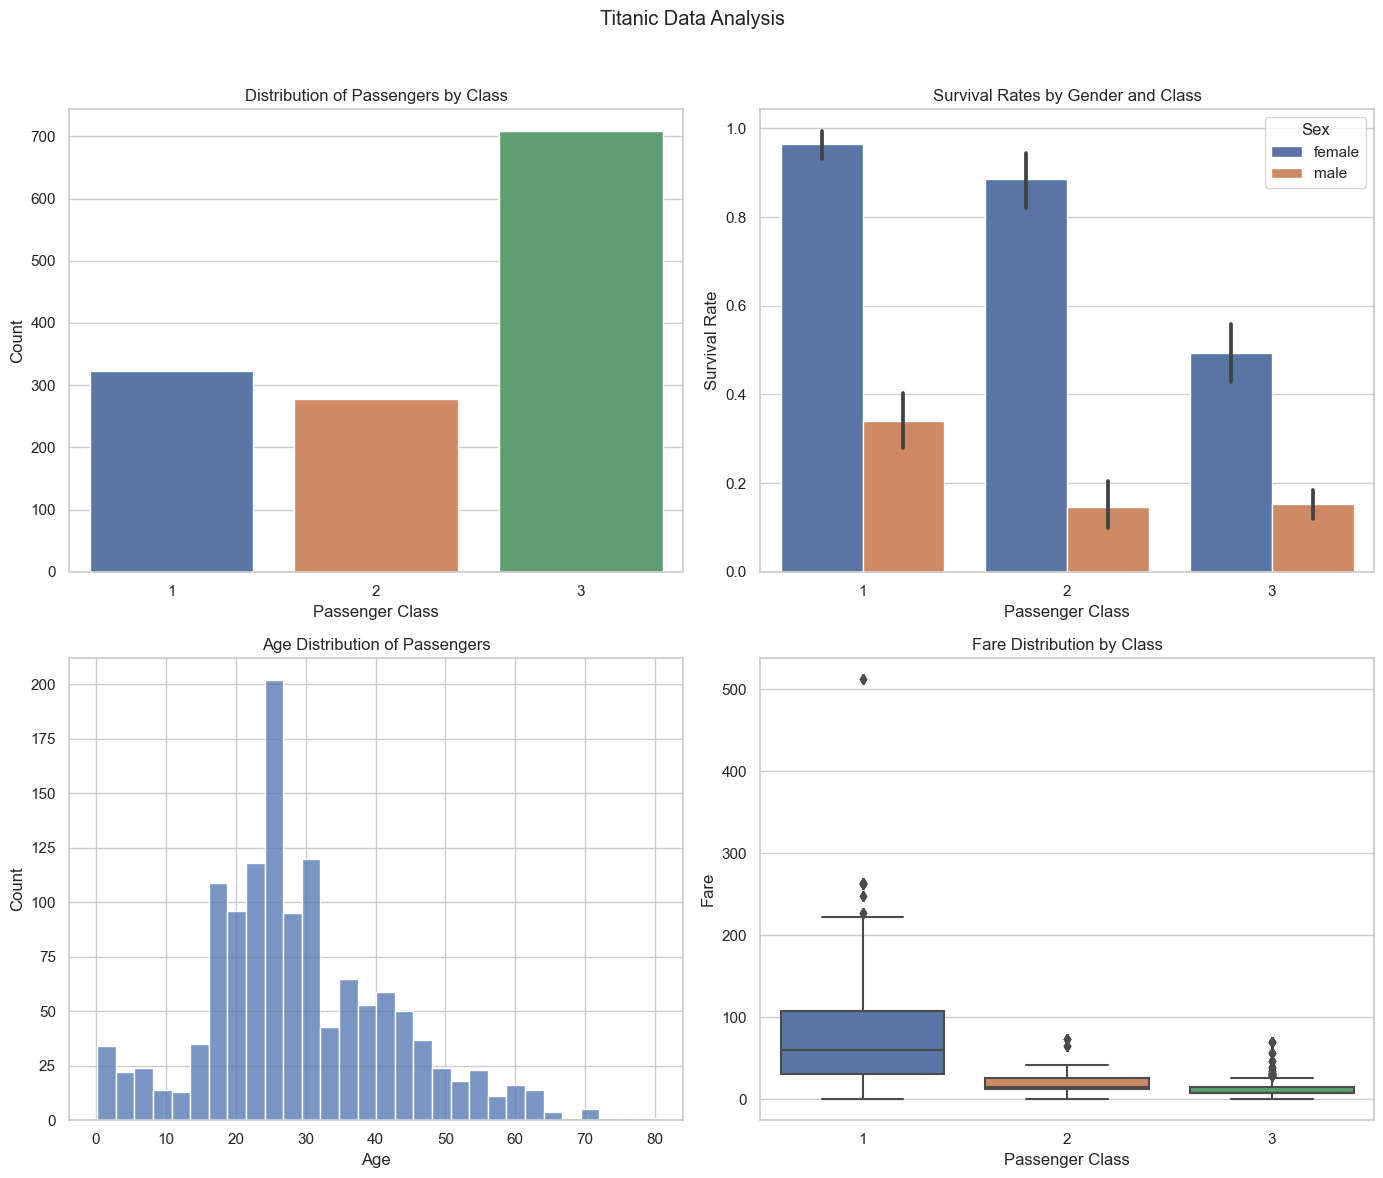

In [38]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Titanic Data Analysis')


# Plot 1: Distribution of passengers by class
sns.countplot(x='Passenger Class', data=dfSurvivals, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Passengers by Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Count')

# Plot 2: Survival rates by gender and class
sns.barplot(x='Passenger Class', y='Survived', hue='Sex', data=dfSurvivals, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rates by Gender and Class')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Survival Rate')

# Plot 3: Age distribution of passengers
sns.histplot(dfSurvivals['Age'].dropna(), bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution of Passengers')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

# Plot 4: Fare distribution by class
sns.boxplot(x='Passenger Class', y='Fare', data=dfSurvivals, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Class')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Fare')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\juank\AppData\Local\Temp\ipykernel_22720\1599070342.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfSurvivals.corr()


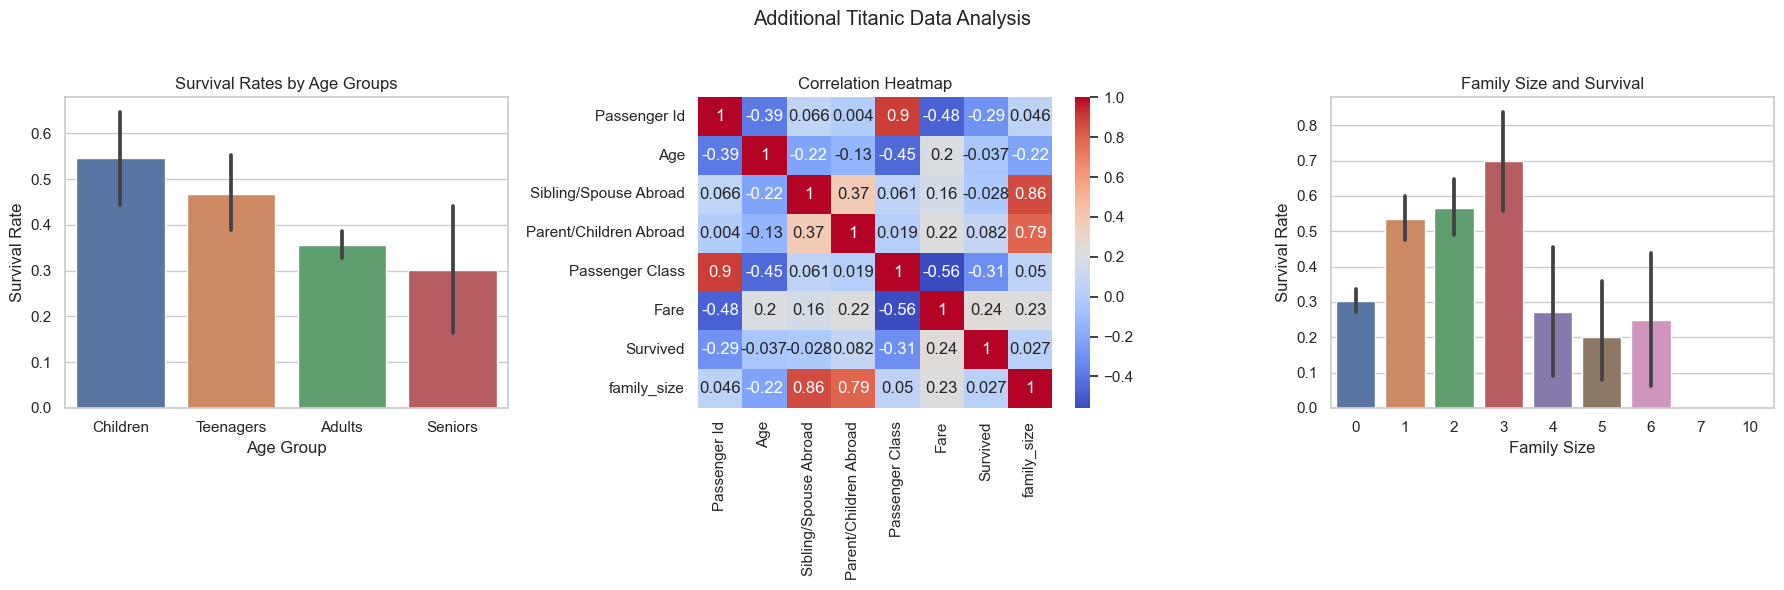

In [40]:
# 1. Create Age Groups
bins = [0, 12, 19, 59, 100]
labels = ['Children', 'Teenagers', 'Adults', 'Seniors']
dfSurvivals['age_group'] = pd.cut(dfSurvivals['Age'], bins=bins, labels=labels, right=False)

# 2. Create Family Size feature
dfSurvivals['family_size'] = dfSurvivals['Sibling/Spouse Abroad'] + dfSurvivals['Parent/Children Abroad']

# Initialize the figure for the three plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Additional Titanic Data Analysis')

# Plot 1: Survival Rates by Age Groups
sns.barplot(x='age_group', y='Survived', data=dfSurvivals, ax=axes[0])
axes[0].set_title('Survival Rates by Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Survival Rate')

# Plot 2: Correlation Heatmap
correlation_matrix = dfSurvivals.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

# Plot 3: Family Size and Survival
sns.barplot(x='family_size', y='Survived', data=dfSurvivals, ax=axes[2])
axes[2].set_title('Family Size and Survival')
axes[2].set_xlabel('Family Size')
axes[2].set_ylabel('Survival Rate')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [41]:
dfSurvivals.to_csv('Base_Cleaned_DS', index=False)